In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [5]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred,y)

array([[337,  30],
       [ 20, 182]], dtype=int64)

* 정확도

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y)

0.9121265377855887

* 정밀도

In [8]:
from sklearn.metrics import precision_score

precision_score(y_pred, y)

0.8584905660377359

* 재현율

In [10]:
from sklearn.metrics import recall_score

recall_score(y_pred, y)

0.900990099009901

* F1 score

In [11]:
from sklearn.metrics import f1_score

f1_score(y_pred, y)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [35]:
pred_proba = model_lor.predict_proba(X)
pred_proba = pred_proba[:,1].reshape(-1,1)

In [36]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold = 0.1).fit(pred_proba)
y_pred2 = binarizer.transform(pred_proba)

In [37]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print(confusion_matrix(y_pred2,y))
print(accuracy_score(y_pred2,y))
print(precision_score(y_pred2,y))
print(recall_score(y_pred2,y))
print(f1_score(y_pred2, y))

[[267   6]
 [ 90 206]]
0.8312829525483304
0.9716981132075472
0.6959459459459459
0.8110236220472441


* ROC 곡선 시각화

In [38]:
from sklearn.metrics import roc_curve 

fprs, tprs, thresholds = roc_curve(y, pred_proba)

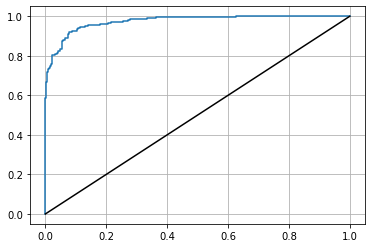

In [45]:
import matplotlib.pyplot as plt 

plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0,1], [0,1], 'k-', label = 'Random')
plt.grid()

* ROC AUC 값

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, pred_proba)

0.9741557000158554